<a href="https://colab.research.google.com/github/meghnakaintura12/deeplearning/blob/main/2_simple_rnn_IMDB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
"""
Last amended: 21st Sep, 2023
My folder: /home/ashok/Documents/8.rnn
           github/harnalashok/deeplearning-sequences/
Ref: Page
 https://www.tensorflow.org/tutorials/text/word_embeddings

Objectives:
        i)   To use SimpleRNN for Sentiment analysis
        ii)  To understand structure of Embedding layer
       iii)  To use TensorBoard to display loss-history
        iv)  To use embedding projector
	       v) To perform tokenization, see file:
             8.rnn/3.keras_tokenizer_class.py OR file
             8.rnn/0.document_to_id_conversion.py
	         And a quick note at the end of this code.

"""

'\nLast amended: 21st Sep, 2023\nMy folder: /home/ashok/Documents/8.rnn\n           github/harnalashok/deeplearning-sequences/\nRef: Page\n https://www.tensorflow.org/tutorials/text/word_embeddings\n\nObjectives:\n        i)   To use SimpleRNN for Sentiment analysis\n        ii)  To understand structure of Embedding layer\n       iii)  To use TensorBoard to display loss-history\n        iv)  To use embedding projector\n\t       v) To perform tokenization, see file:\n             8.rnn/3.keras_tokenizer_class.py OR file\n             8.rnn/0.document_to_id_conversion.py\n\t         And a quick note at the end of this code.\n\n'

## Sentiment analysis with IMDB data

### Call libraries

In [2]:

# 1.0 Call libraries
#%reset -f
import numpy as np

# 1.1 Import module imdb & other keras modules
import tensorflow as tf
from tensorflow.keras.datasets import imdb

# 1.2 API to manipulate sequences of words
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential

# 1.3 We will have three types of layers.
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense

# 1.4 Misc
import matplotlib.pyplot as plt
import time
import io


In [3]:
# 1.5 Display multiple commands output from a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### Get data

In [4]:
# 2.1 Define some constants:

max_vocabulary = 10000        # words
max_len_review = 500          # words

In [5]:
# 2.2 About imdb module
#help(imdb.load_data)

In [6]:
# 2.3 Get imdb reviews. Limit vocabulary to size max_vocabulary
#      imdb reviews will be downloaded unless available at ~/.keras/datasets
# ************
#      See comments at the end as to how to quickly convert text to integers
# ************

(X_train,y_train),(X_test,y_test) = imdb.load_data(
                                                    num_words=max_vocabulary
                                                   )

In [7]:
# 2.4 Check if our downloaded data file(s) are here:

!ls -la ~/.keras/datasets

total 17064
drwxr-xr-x 2 root root     4096 Sep 22 03:37 .
drwxr-xr-x 1 root root     4096 Sep 22 03:37 ..
-rw-r--r-- 1 root root 17464789 Sep 22 03:37 imdb.npz


In [8]:
# 2.5 About our data

type(X_train)      # numpy.ndarray
print("\n")
f"Shape of X_train {X_train.shape}"      # (25000,)  Total 25000 reviews
print("\n")
f"Shape of X_test {X_test.shape}"       # (25000,)  Total 25000 reviews
print("\n")
y_train.shape      # (25000,)  Total 25000 pos/neg labels
print("\n")
y_test.shape       # (25000,)  Total 25000 pos/neg labels

numpy.ndarray

'Shape of X_train (25000,)'

'Shape of X_test (25000,)'

(25000,)

(25000,)

### Explore data

In [9]:
# 2.5.1
X_train[0:5]       # Have a look at three arrays (documents)
print("\n\n------------\n\n")
y_train[:4]       # array([1, 0, 0, 1])

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228,



------------




array([1, 0, 0, 1])

In [10]:
# 2.5.2 Every comment has different number of words
len(X_train[1])     # 189
print("\n\n------------\n\n")
len(X_train[10])    # 450

189



------------




450

In [11]:
# 2.6 Check max and min length of reviews
maxLen = 0         # Start with a low number
minLen = 200       # Start with a high number
for i in range(X_train.shape[0]):  # Go over all 25000
    if len(X_train[i]) > maxLen:
        maxLen = len(X_train[i])
    if len(X_train[i]) < minLen :
        minLen = len(X_train[i])


In [12]:
# 2.6.1
maxLen         # 2494
print()
minLen         # 11

2494

11

### Process data

In [13]:
# 3.0 We want to pad all sequences to max_len_review size.
#     Reviews more in size will be truncated and less in
#     size will be padded with zeros

Syntax of pad_sequences is:

```
tf.keras.utils.pad_sequences(
                              sequences,
                              maxlen=None,
                              dtype='int32',
                              padding='pre',
                              truncating='pre',
                              value=0.0
                            )

```
This function transforms a list (of length `num_samples`) of sequences (lists of integers) into a 2D Numpy array of shape `(num_samples, num_timesteps)`. `num_timesteps` is either the `maxlen` argument if provided, or the length of the longest sequence in the list.

In [14]:
# 3.1 Example:

seq = np.array([
                 list([1]),
                 list([2, 3]),
                 list([4, 5, 6])
                ], dtype=object)

print(seq.shape)
print("")
tf.keras.preprocessing.sequence.pad_sequences(seq ,
                                              value = -1   # Default value = 0
                                              )



(3,)



array([[-1, -1,  1],
       [-1,  2,  3],
       [ 4,  5,  6]], dtype=int32)

In [15]:
# 3.2 Pad x_train sequences
#       And also make each inner list as one row:

X_train = sequence.pad_sequences(
                                 X_train,   # An array of lists where each inner
                                            # list is a sequence, Or,
                                            # A list of lists with each
                                            #  list being a sequence
                                 maxlen = max_len_review,   # This is default
                                 padding = 'post'   # option: 'post'
                                 )


In [16]:
# 3.3 Recheck again:

type(X_train)          # numpy.ndarray
print("\n\n------------\n\n")
X_train.shape          # (25000, 500) Each sequence becomes one row
print("\n\n------------\n\n")
len(X_train[1])     # 189
print("\n\n------------\n\n")
len(X_train[10])    # 450

numpy.ndarray



------------




(25000, 500)



------------




500



------------




500

In [17]:
# 3.4 Look at first twenty rows
#      and first twenty columns:

X_train[:20,:10]

array([[   1,   14,   22,   16,   43,  530,  973, 1622, 1385,   65],
       [   1,  194, 1153,  194, 8255,   78,  228,    5,    6, 1463],
       [   1,   14,   47,    8,   30,   31,    7,    4,  249,  108],
       [ 687,   23,    4,    2, 7339,    6, 3693,   42,   38,   39],
       [   1,  249, 1323,    7,   61,  113,   10,   10,   13, 1637],
       [   1,  778,  128,   74,   12,  630,  163,   15,    4, 1766],
       [   1, 6740,  365, 1234,    5, 1156,  354,   11,   14, 5327],
       [   4, 3231,  152,  339, 5206,   42, 4869,    2, 6293,  345],
       [   1,   43,  188,   46,    5,  566,  264,   51,    6,  530],
       [   1,   14,   20,   47,  111,  439, 3445,   19,   12,   15],
       [   1,  785,  189,  438,   47,  110,  142,    7,    6, 7475],
       [   1,   54,   13, 1610,   14,   20,   13,   69,   55,  364],
       [   1,   13,  119,  954,  189, 1554,   13,   92,  459,   48],
       [   1,  259,   37,  100,  169, 1653, 1107,   11,   14,  418],
       [   1,  503,   20,   33,  1

### Word Embeddings

Word embeddings give us a way to use an efficient, dense representation in which similar words have a similar encoding. Importantly, you do not have to specify this encoding by hand. An embedding is a dense vector of floating point values (the length of the vector is a parameter you specify). Instead of specifying the values for the embedding manually, they are trainable parameters (weights learned by the model during training, in the same way a model learns weights for a dense layer). It is common to see word embeddings that are 8-dimensional (for small datasets), up to 1024-dimensions when working with large datasets. A higher dimensional embedding can capture fine-grained relationships between words, but takes more data to learn.

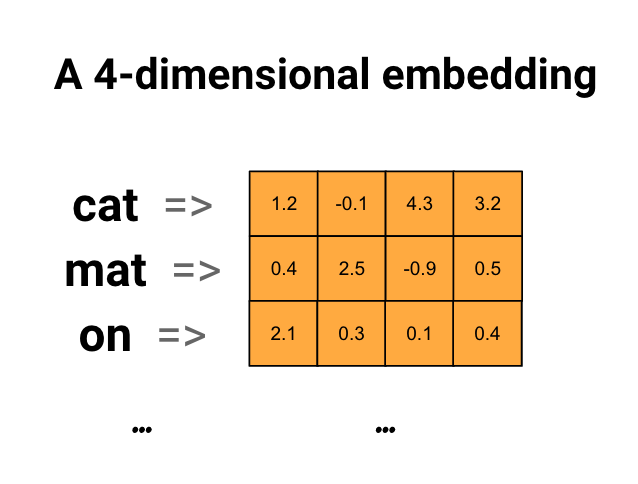

Above is a diagram for a word embedding. Each word is represented as a 4-dimensional vector of floating point values. Another way to think of an embedding is as "lookup table". After these weights have been learned, you can encode each word by looking up the dense vector it corresponds to in the table.



#### Domain importance

Learnt embeddings depend upon the domain from where the corpus of documents have been picked up. For example, in medical corpus, the word '*finished*' may be closer to the word '*death*' while in normal usage the word '*finished*' may be closer to the word '*completed*'. Similary the word '*operation*' in medical corpus will be similar to '*surgery*' while in normal usage it will be similar to '*working*' or '*running*'. Similarly, the word '*save*' in medical terminolgy may be more akin to '*life*' while in computer science, it is more similar to '*file*'.

### RNN

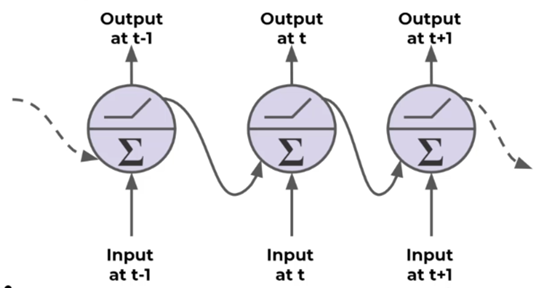

A [recurrent neural network (RNN)](https://www.ibm.com/cloud/learn/recurrent-neural-networks) is a type of artificial neural network which uses sequential data or time series data. These deep learning algorithms are commonly used for time-related problems, such as language translation, natural language processing (nlp), speech recognition, and image captioning; they are incorporated into popular applications such as Siri, voice search, and Google Translate. Like feedforward and convolutional neural networks (CNNs), recurrent neural networks utilize training data to learn. They are distinguished by their “memory” as they take information from prior inputs to influence the current input and output. While traditional deep neural networks assume that inputs and outputs are independent of each other, the output of recurrent neural networks depend on the prior elements within the sequence. While future events would also be helpful in determining the output of a given sequence, unidirectional recurrent neural networks cannot account for these events in their predictions.  
Let’s take an idiom, such as “feeling under the weather”, which is commonly used when someone is ill, to aid us in the explanation of RNNs. In order for the idiom to make sense, it needs to be expressed in that specific order. As a result, recurrent networks need to account for the position of each word in the idiom and they use that information to predict the next word in the sequence. Given “feeling under the -----”, RNN should be able to predict the next word.

#### [The Unreasonable Effectiveness of Recurrent Neural Networks](http://karpathy.github.io/2015/05/21/rnn-effectiveness/)

Each rectangle is a vector and arrows represent functions (e.g. matrix multiply). Input vectors are in red, output vectors are in blue and green vectors hold the RNN's state (more on this soon). From left to right: (1) Vanilla mode of processing without RNN, from fixed-sized input to fixed-sized output (e.g. image classification). (2) Sequence output (e.g. image captioning takes an image and outputs a sentence of words). (3) Sequence input (e.g. sentiment analysis where a given sentence is classified as expressing positive or negative sentiment). (4) Sequence input and sequence output (e.g. Machine Translation: an RNN reads a sentence in English and then outputs a sentence in French). (5) Synced sequence input and output (e.g. video classification where we wish to label each frame of the video). Notice that in every case are no pre-specified constraints on the lengths sequences because the recurrent transformation (green) is fixed and can be applied as many times as we like.

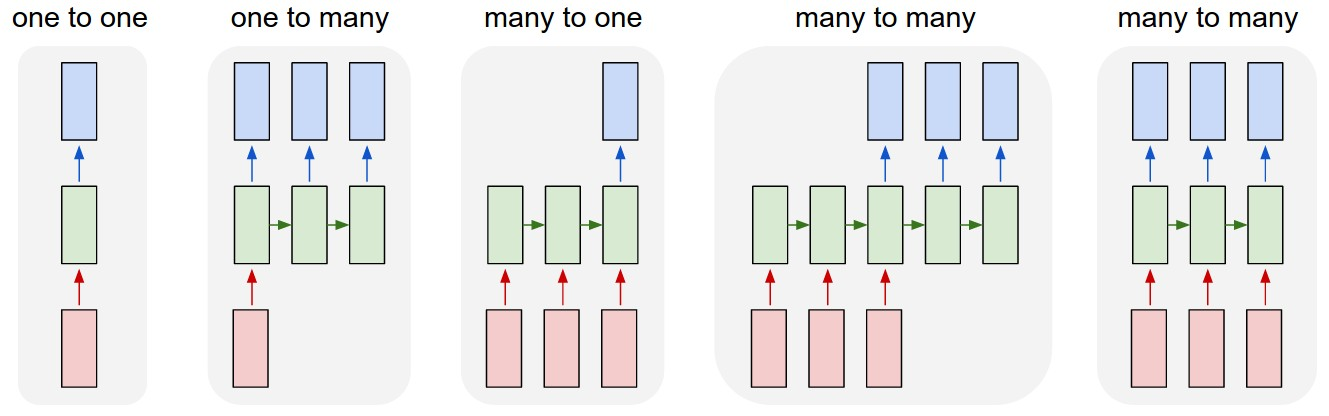

### Design model

In [18]:
# 4.0 Build model now

# 4.0.1 Delete any earlier model
if 'model' in locals():
  del model

# 4.0.2 Out model:

# 4.0.3 Start with a blank template:
model = Sequential()


# 4.1 Add an embedding layer:
model.add(Embedding(
                    max_vocabulary,            # Decides number of input neurons
                    32,                        # Decides number of neurons in hidden layer
                    input_length= max_len_review) # (optional) Decides how many groups of OHEs
                                                  # are input at a time (or in sequence).
                                                  # It also decides how many times
                                                  #  RNN should loop around
                                                  #    If omitted, decided autoamtically
                                                  #     during 'model.fit()' by considering
                                                  #       x_train.shape[1]

          )



In [19]:
# 4.2
# It is instructive to see number of parameters
#  in the summary. This tells us about the Embedding
#   layer as being two layered network with no of neurons
#    as max_vocabulary and output (hidden) layer with 32 neurons
#     Note: Hidden layer has no activation function
#            and no bias parameter:

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 32)           320000    
                                                                 
Total params: 320000 (1.22 MB)
Trainable params: 320000 (1.22 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
# 4.3 Ideally we should be adding not one RNN but as many RNNs as
#     there are timesteps ie sequence length or 'max_len_review'.
#     But we add just one and perform internal looping. Note that
#     internal weights and hence LSTM parameters remain same from one
#     'timestep' to another 'timestep'. You can verify this by
#     changing the value of max_len_review and seein that number
#     of parameters in the model summary after adding the following
#     do not change.

model.add(
           SimpleRNN
                    (
                      32,                      # Neurons at the output
                      return_sequences = False # Make it True
                                               # And add layer #4.4
                    )
          )   # Output


In [21]:
# 4.4 Model summary

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 32)           320000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                2080      
                                                                 
Total params: 322080 (1.23 MB)
Trainable params: 322080 (1.23 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
# 4.5 Add classification layer:

model.add(Dense(1, activation = 'sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 32)           320000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                2080      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 322113 (1.23 MB)
Trainable params: 322113 (1.23 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### How Embedding layer and SimpleRNN work together

What is embedding?<br>
Embedding is a process to embed words in a dense vector space so that words having about the same context have vectors close to one another

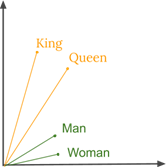

When one enter ***Go*** in google, first paired word is ***‘first’*** ie (‘go first’) then ***‘air’*** ie (‘go air’). This is how learning happens:

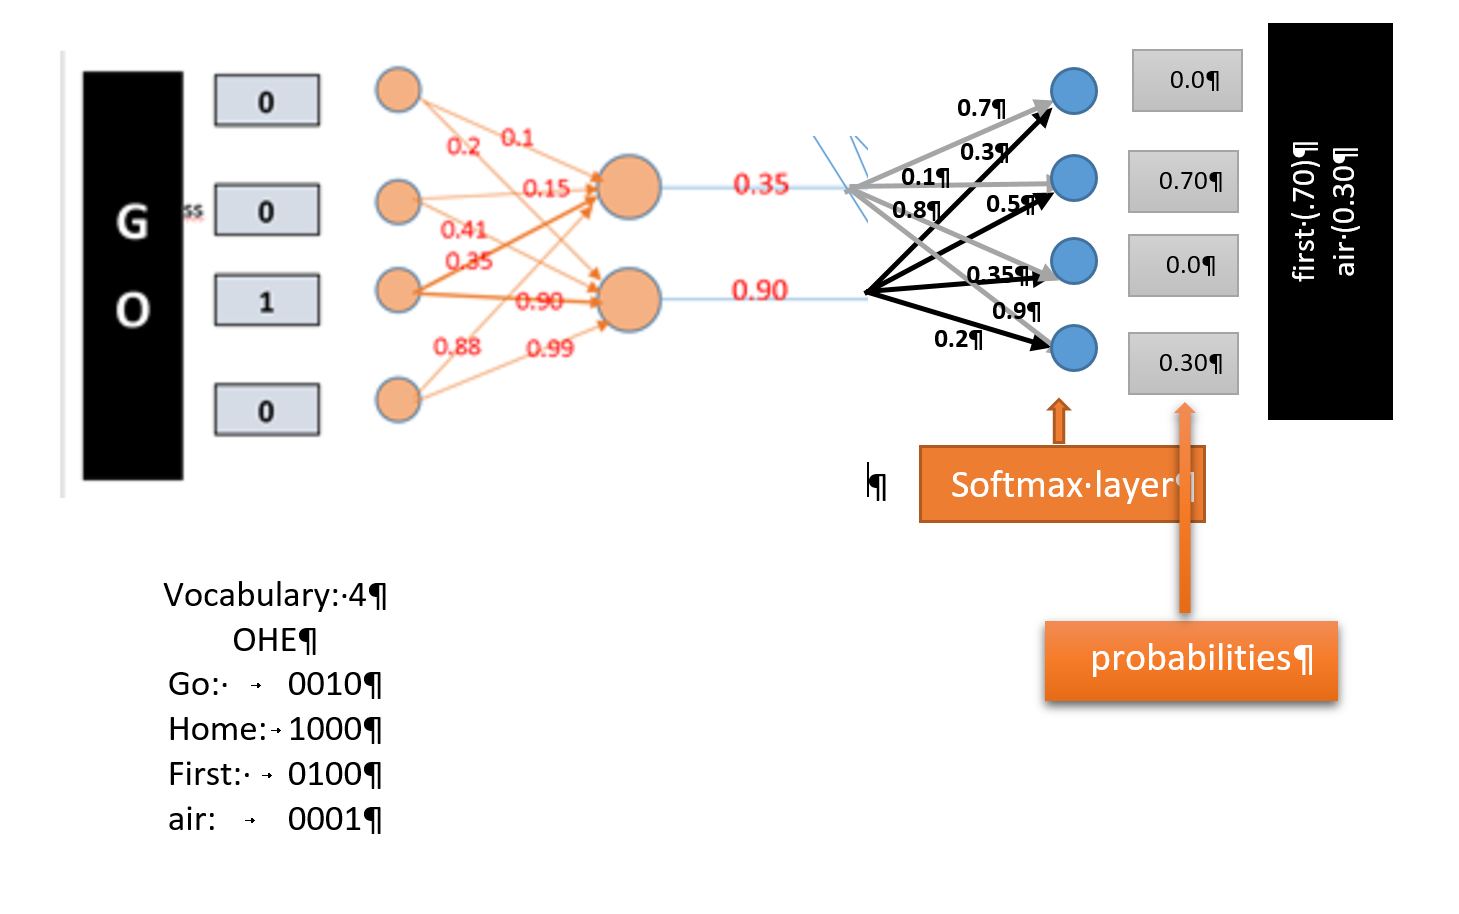

The Model

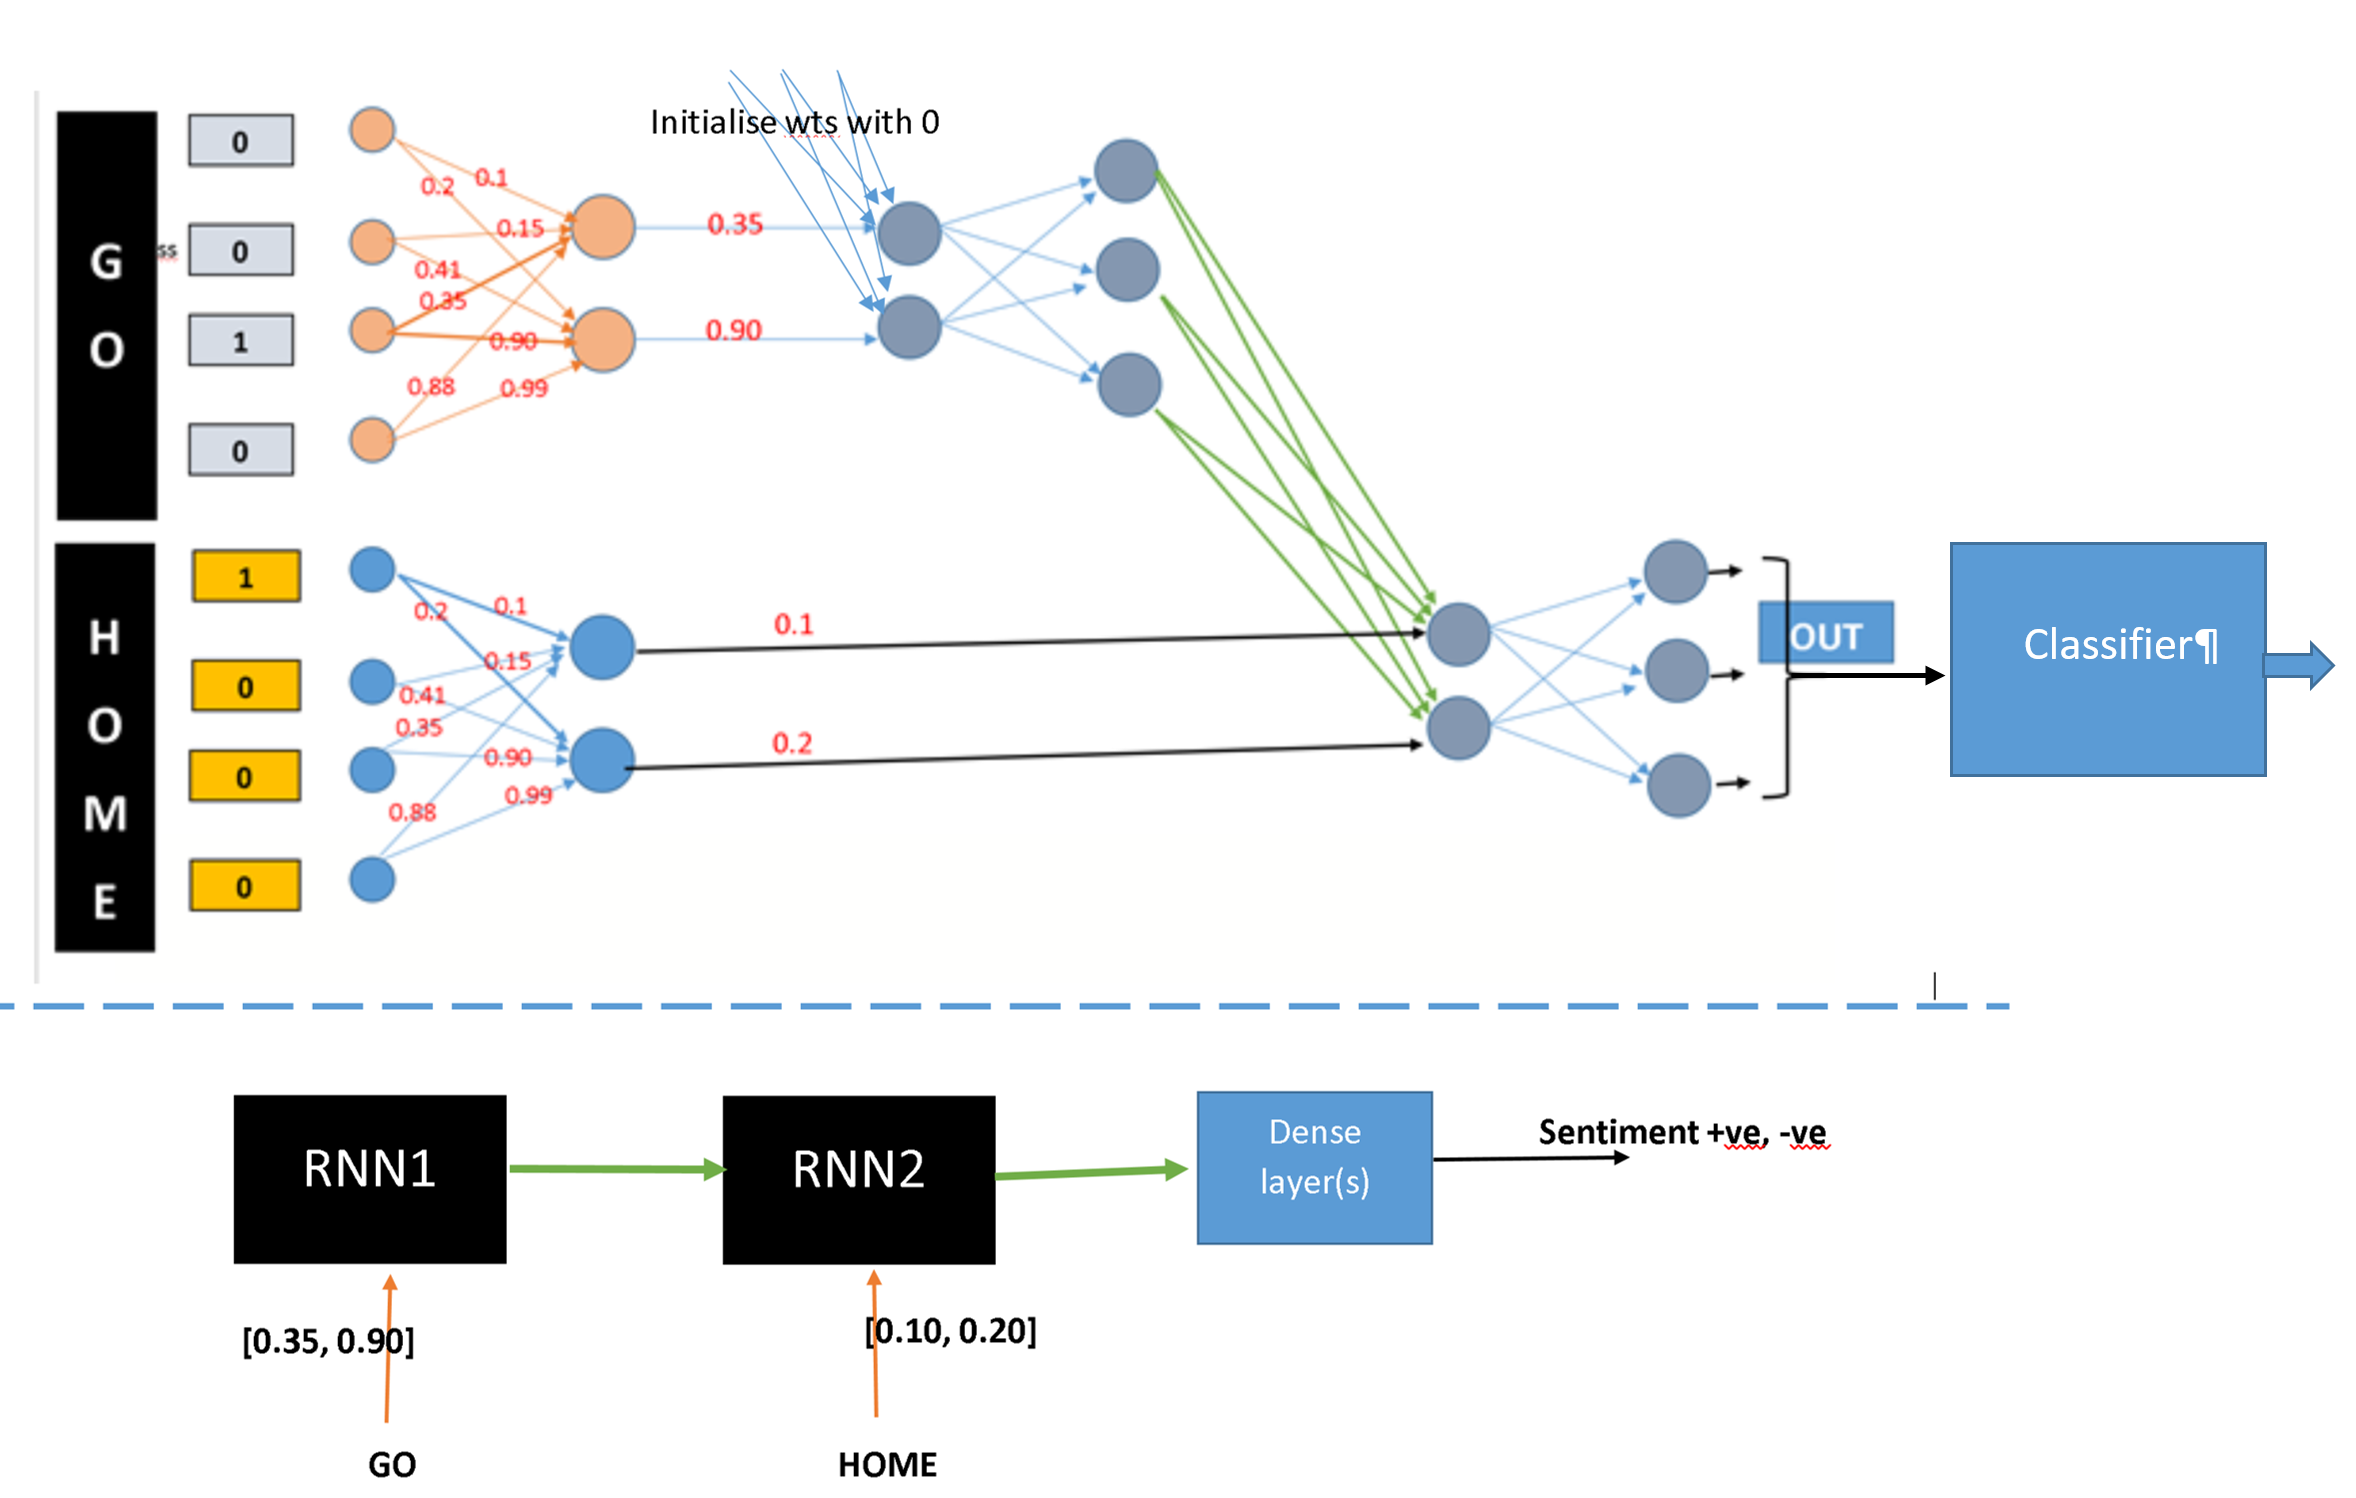

```
Sequence: GO HOME
Vocabulary: GO, TO, My, Home
Vocabulary: 4; Max Sequence Length = 2 ; Each word is coded as: 2 floating pt values
model.add(Embedding (4,2,2))
model.add(SimpleRNN(2))
Note weights of Embedding layer for 'GO' and for 'Home' are the same. And also for RNN1 and RNN2 are the same.



```

In [23]:
# 4.6 JUMP FOLLOWING UNLESS YOU WANT 'RNN' ABOVE 'RNN'. IT WORKS.
#     BUT TAKES TIME.
# 4.6 Make return_sequences = True in 3.3 above, before you add
#     the following layer with return_sequences = False. Else JUMP it.
#     ACCURACY IS SOMEWHAT MORE

#model.add(SimpleRNN(
#                    32,
#                    return_sequences = False   # Make return_sequences = True
#                                               # in earlier RNN for this to work
#                    )
#                    )   # Output
#

In [24]:
"""
Why SimpleRNN adds 2080 parameters?
    input_features * output_features = 32 * 32  = 1024
    state_t * output_features        = 32 * 32  = 1024
    Bias                                            32
    Total                                         2080
This total is INDEPENDENT of sequence length or timesteps.
"""

'\nWhy SimpleRNN adds 2080 parameters?\n    input_features * output_features = 32 * 32  = 1024\n    state_t * output_features        = 32 * 32  = 1024\n    Bias                                            32\n    Total                                         2080\nThis total is INDEPENDENT of sequence length or timesteps.\n'

### Plot model

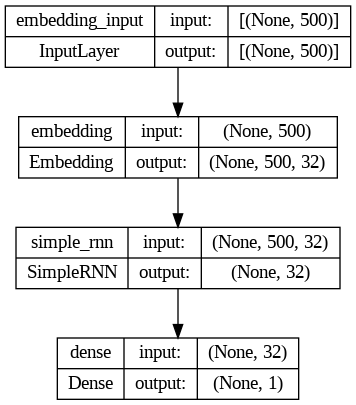

In [25]:
# 4.7 Plot model
tf.keras.utils.plot_model(
                          model,
                          show_shapes=True
                          )


### Compile model

In [26]:
# 4.8 Compile model
model.compile(
               loss = 'binary_crossentropy',
               optimizer = 'rmsprop',
               metrics = ['acc']
              )

In [27]:
# 4.9  Tensorboard callback
#       We will use TensorBoard to visualize metrics
#       including loss, accuracy etc.
#       Create a tf.keras.callbacks.TensorBoard

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir="logs")


Optmizer

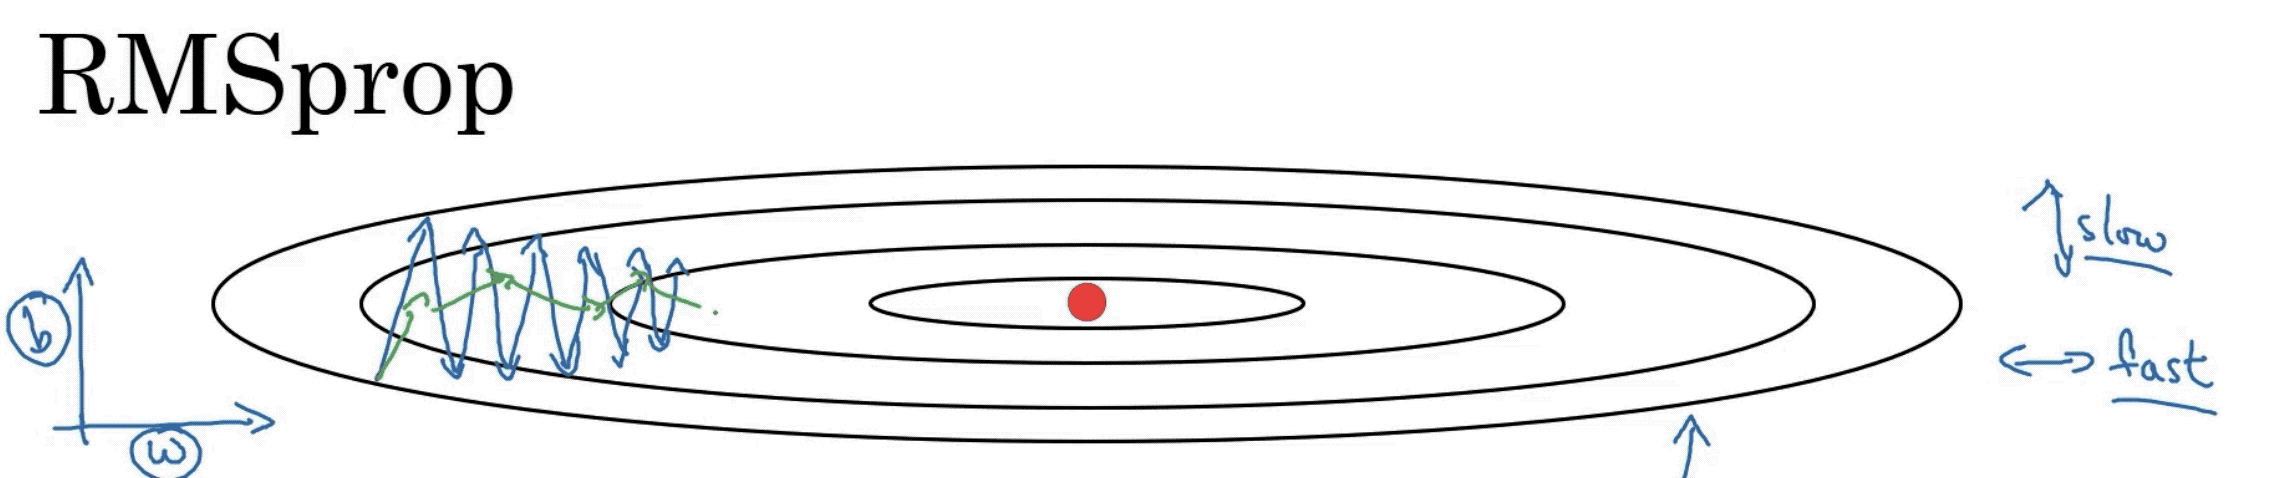

### Train model

In [28]:
# 5.0  Takes time 170 secs per epoch

epochs = 15
start = time.time()
history = model.fit(X_train,
                    y_train,
                    batch_size = 32,             # Number of samples per gradient update
                    validation_split = 0.2,      # Fraction of training data to be used as validation data
                    epochs = 4 # epochs,
                    shuffle = True,              # Shuffle training data before each epoch
                    callbacks=[tensorboard_callback],
                    verbose =1
                    )
end = time.time()
(end-start)/60


SyntaxError: ignored

### Display metrics in tensorboard

In [ ]:
# 6.0 Start tensorboard server
#     and display logs

%load_ext tensorboard
%tensorboard --logdir logs

### Get and display weights in Embedding Projector

Project learnt points in three dimensional space. The process is like this: weights are uploaded to *Embedding Projector*. As dimension of weights is large (32 in our case), PCA is used to reduce it to three dimensions. And then it is plotted in 3D using embedding projector. Each point is labeled by the corresponding word.  

We create file, '*vectors.tsv*', to store weights. File, '*metadata.tsv*', contains corresponding words. Both files will first be created. Then transferred to gdrive and from there to our laptop.  

In the [Embedding projector](http://projector.tensorflow.org/), we have to upload these two files (from our laptop) to display our vectors. Open embedding projector and then click on load button to upload the two files.

In [ ]:
# 7.0 Get embedding layer weights:

weights = model.get_layer('embedding').get_weights()

In [ ]:
# 7.1 Check:

type(weights)    # list
len(weights)     # 1

In [ ]:
# 7.1.1
weights

In [ ]:
# 7.2
# Extract array of weights
#  and print its shape
weights = weights[0]
weights
print("--")
weights.shape   # (10000, 32)

In [ ]:
# 7.3 Get vocabulary:

type(imdb.get_word_index())   # dictionary
vocab = imdb.get_word_index()
vocab  # dict

In [ ]:
# 7.4 Create empty files to store
#     weight-vectors and metadata
#     (labels):

out_v = io.open('vectors.tsv', 'w', encoding='utf-8')
out_m = io.open('metadata.tsv', 'w', encoding='utf-8')


In [ ]:
# 7.5 Check if files created:

! ls -la
! pwd

In [ ]:
# 7.6 Store data in the two files:

for word, index in vocab.items():
  if index < 10000:
    vec = weights[index]
    _=out_v.write('\t'.join([str(x) for x in vec]) + "\n")
    _=out_m.write(word + "\n")


# 7.7

out_v.close()
out_m.close()

In [ ]:
# 7.8 Check if the two files are there:

! ls -la

### Mount gdrive

In [ ]:
# 8.0
# Mount google drive:

from google.colab import drive
drive.mount('/content/gdrive')

In [ ]:
# 8.1   Copy files from VM
#       to gdrive

!cp /content/vectors.tsv   /content/gdrive/MyDrive/Colab_data_files
!cp /content/metadata.tsv  /content/gdrive/MyDrive/Colab_data_files

In [ ]:
# 8.2 Check if files copied
#       to gdrive:

! ls -la /content/gdrive/MyDrive/Colab_data_files

Next steps  

Download the two files from gdrive to your laptop. And then upload them to [Embedding Projector](http://projector.tensorflow.org/).

In [ ]:
########### I am done ######################

In [ ]:
# 6.1 Get x_test padded
x_test = sequence.pad_sequences(
                                 x_test,   # A list of lists where each inner
                                            # list is a sequence, Or,
                                            # An array of lists with each
                                            #  list being a sequence
                                 maxlen = max_len_review,
                                 padding = 'pre'
                                 )

In [ ]:
# 6.2 Predict now
out = model.predict(x_test)
out[out > 0.5]  = 1
out[out <= 0.5] = 0
out

In [ ]:
# 6.3
model.evaluate(x_test,y_test)
# 7.3.1
model.metrics_names        # ['loss', 'acc']


In [ ]:
############ I am done ################

### Text to integer conversion

In [ ]:
###############################################################
# Here is Quick text to integer conversion
#  For more study, please see file: 3.keras_tokenizer_class.py
###############################################################


In [ ]:
# 1.0 Call library
from tensorflow.keras.preprocessing.text import Tokenizer

In [ ]:
# 1.1 Write some comments. Total nine tweets here.

texts = ["Sun shines brightly  in June! Sun is life.",
         "Star light shines on water?",
         "Water is flowing. Water shines.",
         "Flowing water, shines",
         "Sun is star?",
         "World shines",
         "Star also shines",
         "water is life",
         "Sun is energy"]

In [ ]:
# 1.2 Tokenize text:

tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)


In [ ]:
# 1.3 Which word has which token:

tokenizer.word_index       # Index is created based on word-frequencies
                           # Most frequent word gets the least index

In [ ]:
# 1.4 Text transformed to sequence of integers
#     We get a list of lists

tokenizer.texts_to_sequences(texts)

In [ ]:
#############################################

[Reference](https://aegis4048.github.io/demystifying_neural_network_in_skip_gram_language_modeling)

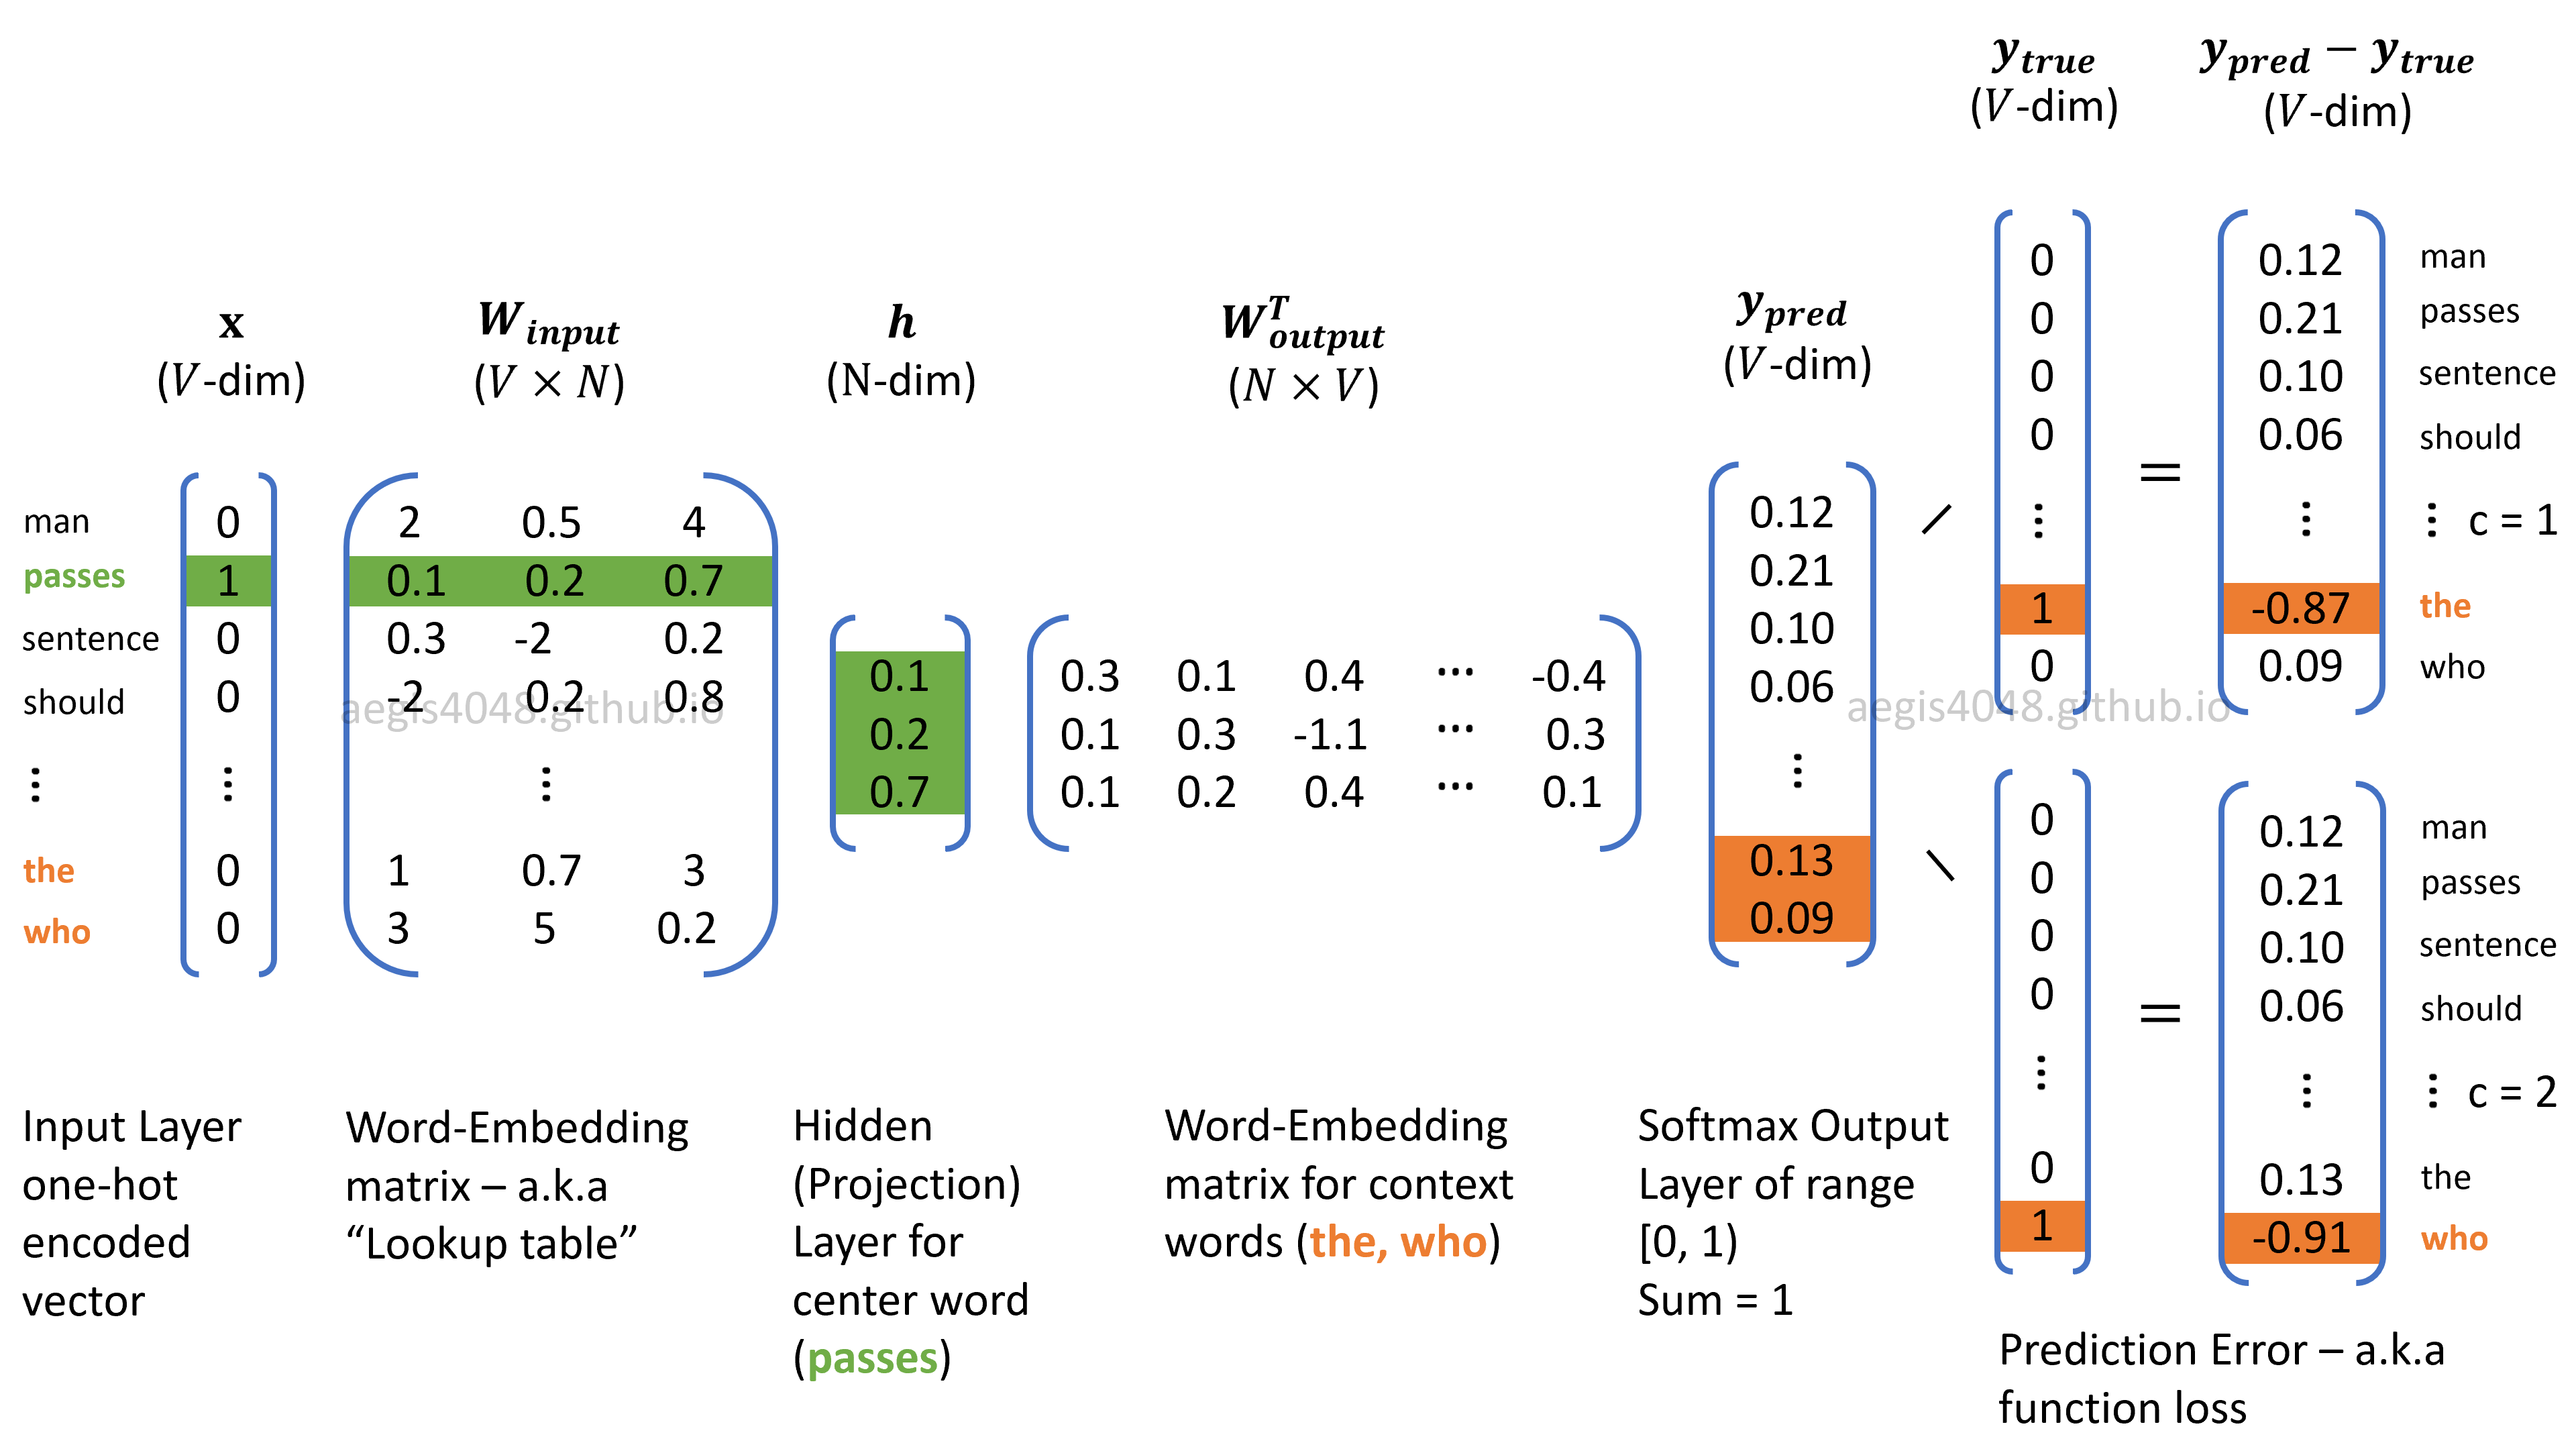